## This notebook covers some of the most fundamental concepts of tensors using Tensorflow

* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors & Numpy
* Using @tf.function to speed up regular Python functions
* Using GPUs or TPUs with TensorFlow
* Exercises

The tutorial of this notebook can be found here: https://www.youtube.com/watch?v=tpCFfeUEGs8&list=PL6vjgQ2-qJFfU2vF6-lG9DlSa4tROkzt9&index=1

## Introduction to Tensors

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


* Scalar: a single number
* Vector: a number with direction (e.g wind speed and direction)
* Matrix: a 2-dimensional array of numbers
* Tensor: an n-dimensional array of numbers

In [ ]:
# Create tensors with tf.constant()
# https://www.tensorflow.org/api_docs/python/tf/constant
# If the argument dtype is not specified, then the type is inferred from the type of value.

scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# Check dimensions

scalar.ndim

0

In [ ]:
# Create a vector

vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
vector.ndim

1

In [ ]:
# Create a matrix

matrix= tf.constant([[10, 7],
                     [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim

2

In [ ]:
# Create another matrix with specified datatype

matrix_2 = tf.constant([[10., 7.],
                        [3., 2.],
                        [8., 9.]], dtype = tf.float16)
matrix_2

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
matrix_2.ndim

2

In [ ]:
# Create a tensor

tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                      [10, 11, 12]],
                     [[13, 14, 15],
                      [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim

3

### Creating Tensors with `tf.variable`

https://www.tensorflow.org/api_docs/python/tf/Variable

In [ ]:
# Create the same tensor with tf.Variable()

changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# Try to change one of the elements

changeable_tensor[0] = 7

TypeError: ignored

In [ ]:
# Use .assign()

changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
# Try to change one of the elements of unchangeable tensor

unchangeable_tensor[0] = 7

TypeError: ignored

In [ ]:
unchangeable_tensor[0].assign(7)

AttributeError: ignored

Value of variables declared with `.constant()` is unchangeable and can only be declared with value and not an operation.

Value of variable declared with `.Variable()` is changeable using `.assign()` and can be declared with value or an operation.

https://stackoverflow.com/questions/44745855/tensorflow-variables-and-constants

### Creating Random Tensors

Random tensors are tensors in varying size that contains random numbers.

In [ ]:
# Create two random tensors
# https://www.tensorflow.org/api_docs/python/tf/random

random_1 = tf.random.Generator.from_seed(42) # .Generator generate random numbers
random_1 = random_1.normal(shape = (3, 2)) # .normal outputs random values from a normal distribution
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [ ]:
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape = (3, 2))
random_2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [ ]:
random_1 == random_2

<tf.Tensor: shape=(3, 2), dtype=bool, numpy=
array([[ True,  True],
       [ True,  True],
       [ True,  True]])>

### Shuffling The Order of Elements in A Tensor

In [ ]:
# Shuffle a tensor
# tf.random.shuffle randomly shuffles a tensor along its first dimension
# https://www.tensorflow.org/api_docs/python/tf/random/shuffle

not_shuffled = tf.constant([[10, 7],
                          [3, 4],
                          [2, 5]])
not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [ ]:
not_shuffled.ndim

2

In [ ]:
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [10,  7],
       [ 3,  4]], dtype=int32)>

Operations that rely on a random seed actually derive it from two seeds: the global and operation-level seeds. This sets the global seed.

Its interactions with operation-level seeds is as follows:

* If neither the global seed nor the operation seed is set: A randomly picked seed is used for this op.

* If the global seed is set, but the operation seed is not: The system deterministically picks an operation seed in conjunction with the global seed so that it gets a unique random sequence. Within the same version of tensorflow and user code, this sequence is deterministic. However across different versions, this sequence might change. If the code depends on particular seeds to work, specify both global and operation-level seeds explicitly.

* If the operation seed is set, but the global seed is not set: A default global seed and the specified operation seed are used to determine the random sequence.
* If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence.

https://www.tensorflow.org/api_docs/python/tf/random/set_seed


In [ ]:
tf.random.set_seed(12) # global level
tf.random.shuffle(not_shuffled, seed = 12) # operation level

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]], dtype=int32)>

### Other Methods to Create Tensors

In [ ]:
# Create a tensor of 1s
# https://www.tensorflow.org/api_docs/python/tf/ones

tf.ones([3, 4])

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [ ]:
# Create a tensor of 0s
# https://www.tensorflow.org/api_docs/python/tf/zeros

tf.zeros([3, 4])

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Turn NumPy Arrays Into Tensors

In [ ]:
# You can turn NumPy arrays into tensor
# Creating a tensor using .constant and call the variable of the numpy array

import numpy as np
numpy_A = np.arange(1, 25, dtype = np.int32) # create array between 1 and 25
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
A = tf.constant(numpy_A)
A

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [ ]:
B = tf.constant(numpy_A, shape = (2, 3, 4))
A, B

(<tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>,
 <tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>)

### Getting Information from Tensors

Attributes of tensors:

* Shape
* Rank
* Axis or Dimension
* Size

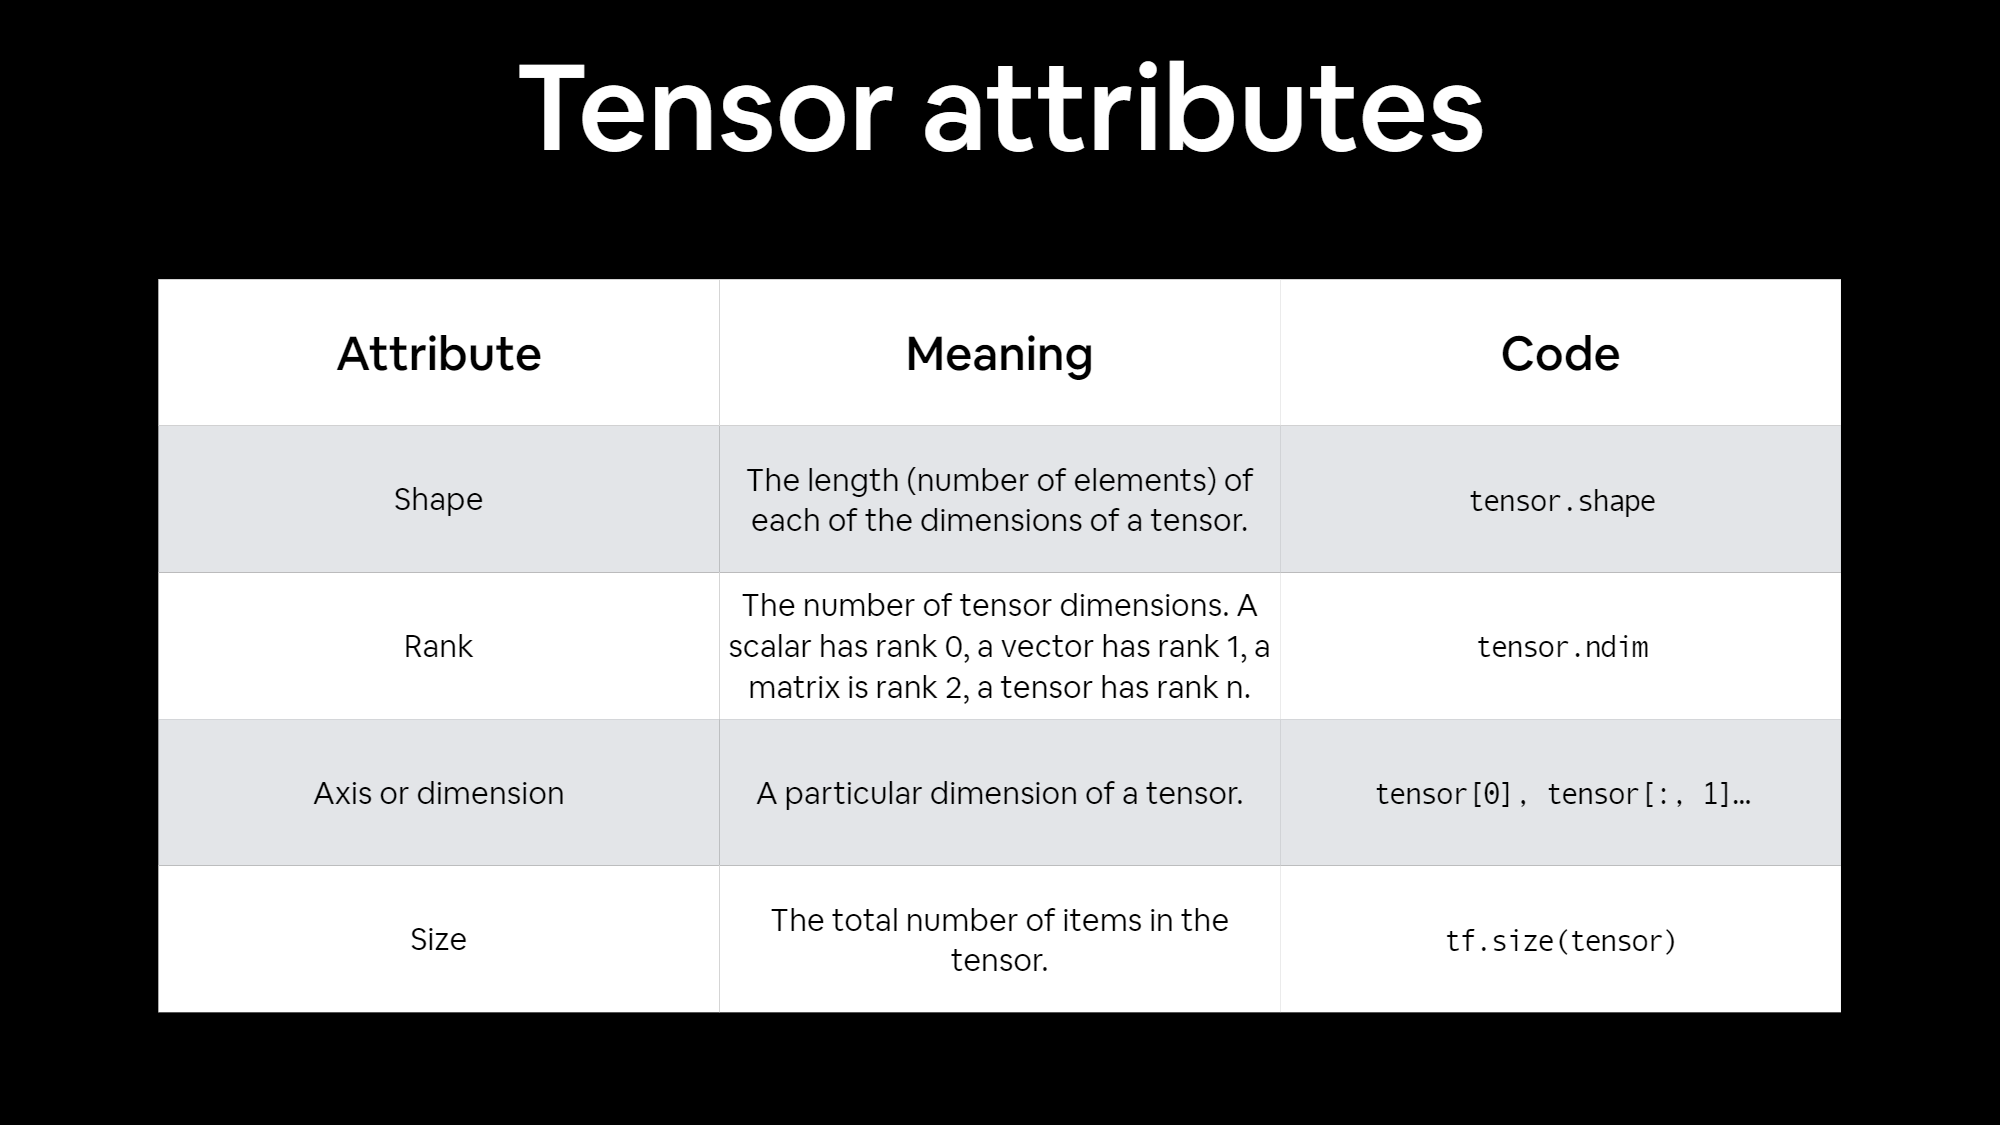


In [ ]:
# Create a rank 4 tensor (tensor with 4 dimensions)

rank_4_tensor = tf.zeros(shape = [2, 3, 4, 5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
# Get various attributes of a tensor

print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimensions:", rank_4_tensor.ndim)
print("Shape of the tensor:", rank_4_tensor.shape)
print("Number of elements along the 0 axis:", rank_4_tensor.shape[0])
print("Number of elements along the last axis:", rank_4_tensor.shape[-1])
print("Total numbers of element in the tensor:", tf.size(rank_4_tensor))

Datatype of every element: <dtype: 'float32'>
Number of dimensions: 4
Shape of the tensor: (2, 3, 4, 5)
Number of elements along the 0 axis: 2
Number of elements along the last axis: 5
Total numbers of element in the tensor: tf.Tensor(120, shape=(), dtype=int32)


In [ ]:
print("Total numbers of element in the tensor:", tf.size(rank_4_tensor).numpy())

Total numbers of element in the tensor: 120


### Indexing Tensors

In [ ]:
ex_list = [1, 2, 3, 4]
ex_list[:2]

[1, 2]

In [ ]:
# Get the first 2 elements of each dimension

rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape

TensorShape([2, 3, 4, 5])

In [ ]:
# Get the first element of each dimension from each index except the last one

rank_4_tensor[:1, :1, :1]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[:1, :1, :, :1]

<tf.Tensor: shape=(1, 1, 4, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         [0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[:1, :, :1, :1]

<tf.Tensor: shape=(1, 3, 1, 1), dtype=float32, numpy=
array([[[[0.]],

        [[0.]],

        [[0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[:, :1, :1, :1]

<tf.Tensor: shape=(2, 1, 1, 1), dtype=float32, numpy=
array([[[[0.]]],


       [[[0.]]]], dtype=float32)>

In [ ]:
# Create a rank 2 tensor

rank_2_tensor = tf.constant([[10, 7],
                             [3, 4]])
rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [ ]:
ex_list, ex_list[-1]

([1, 2, 3, 4], 4)

In [ ]:
# Get the last item of each row

rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [ ]:
# Add extra dimension
# https://www.tensorflow.org/api_docs/python/tf/Tensor#some_useful_examples_2

rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
# tf.newaxis alternative
# https://www.tensorflow.org/api_docs/python/tf/expand_dims

tf.expand_dims(rank_2_tensor, axis = -1) # -1 to expands the last axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
tf.expand_dims(rank_2_tensor, axis = 0) # 0 to expands the 0 axis

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

### Manipulating Tensors Using Tensor Operations

#### Basic Operations

##### Using Basic Python Operators

In [ ]:
# Add values using addition operator

tensor = tf.constant([[10, 7],
                      [3, 4]])
tensor + 5

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[15, 12],
       [ 8,  9]], dtype=int32)>

In [ ]:
# Multiply using multiply operator

tensor * 5

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[50, 35],
       [15, 20]], dtype=int32)>

In [ ]:
# Subtraction using subtraction operator

tensor - 5

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 5,  2],
       [-2, -1]], dtype=int32)>

##### Using Tensorflow Built-in Function

https://www.tensorflow.org/api_docs/python/tf/math

In [ ]:
# Multiply

tf.multiply(tensor, 5)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[50, 35],
       [15, 20]], dtype=int32)>

In [ ]:
tf.add(tensor, 5)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[15, 12],
       [ 8,  9]], dtype=int32)>

#### Matrix Multiplication

How to:
https://www.mathsisfun.com/algebra/matrix-multiplying.html

Visualization:
http://matrixmultiplication.xyz/

In [ ]:
# Matrix multiplication in tensorflow
# https://www.tensorflow.org/api_docs/python/tf/linalg/matmul

print(tensor)
tf.matmul(tensor, tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
# Matrix multiplication with Python operator

tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
# Create two (3, 2) tensors

X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])

Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])

X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
# Matrix multiply tensors
# The operation cannot be done because it doesn't fulfil the matrix multiplication condition

tf.matmul(X, Y)

InvalidArgumentError: ignored

In [ ]:
# Reshape one of the tensors using .reshape()
# https://www.tensorflow.org/api_docs/python/tf/reshape

tf.reshape(Y, shape = (2, 3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [ ]:
X @ tf.reshape(Y, shape = (2, 3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
tf.matmul(X, tf.reshape(Y, shape = (2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
tf.matmul(tf.reshape(X, shape = (2, 3)), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

In [ ]:
# Reshape using transpose
# The results are different because transpose flips the axis while .reshape
# shuffles the elements

tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

**The dot product**

Perform dot product using
* `tf.matmul()`
* `tf.tensordot()`

https://www.tensorflow.org/api_docs/python/tf/tensordot

In [ ]:
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
# Perform dot product on X and Y

tf.tensordot(tf.transpose(X), Y, axes = 1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [ ]:
# Perform matrix multiplication X and Y transposed

tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [ ]:
# Perform matrix multiplication X and Y reshaped

tf.matmul(X, tf.reshape(Y, shape = (2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
# Check values of Y

print("Normal Y:")
print(Y)

print("Y reshaped to (2, 3):")
print(tf.reshape(Y, shape = (2, 3)))

print("Y transposed")
print(tf.transpose(Y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32)
Y reshaped to (2, 3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32)
Y transposed
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


### Change Tensor Datatype

In [ ]:
# Create new tensor
# If the datatype isn't specified, it will take the inferred type of the assigned values

B = tf.constant([1.7, 7.4])
B.dtype

tf.float32

In [ ]:
C = tf.constant([7, 10])
C.dtype

tf.int32

In [ ]:
# Change from float32 to float16
# https://www.tensorflow.org/api_docs/python/tf/cast

D = tf.cast(B, dtype = tf.float16)
D, D.dtype


(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16)

In [ ]:
# int32 to float32

E = tf.cast(C, dtype = tf.float32)
E, E.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>,
 tf.float32)

### Aggregating Tensors

In [ ]:
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [ ]:
# Get the absolute values

tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

Forms of aggregation:
* Get the minimum
* Get the maximum
* Get the mean of a tensor
* Get the sum of a tensor

In [ ]:
# Create a random tensor

E = tf.constant(np.random.randint(0, 100, size = 50))

In [ ]:
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [ ]:
# Find the minimum

tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
# Find the maximum

tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=98>

In [ ]:
# Find the sum

tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2493>

In [83]:
# Find the variance

import tensorflow_probability as tfp

tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=1000>

In [88]:
# Find the standard deviation
# Input must be real or complex (float or complex)
# https://www.tensorflow.org/api_docs/python/tf/math/reduce_std

tf.math.reduce_std(tf.cast(E, dtype = tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=31.618355>

In [89]:
tf.math.reduce_variance(tf.cast(E, dtype = tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=999.7204>

### Find The Positional Maximum and Minimum

In [91]:
# Create new tensor

tf.random.set_seed(42)
F = tf.random.uniform(shape = [50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [92]:
# Find the positional maximum
# https://www.tensorflow.org/api_docs/python/tf/math/argmax

tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [93]:
# Index on the max value position

F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [94]:
# Find the max value of F

tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [95]:
# Check for equality

F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [96]:
# Find the positional minimum

tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [97]:
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

In [98]:
tf.reduce_min(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

### Removing Single Dimensions

In [100]:
# Create a tensor

tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape = [50]), shape = (1, 1, 1, 1, 50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [101]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [102]:
G.ndim

5

In [104]:
# https://www.tensorflow.org/api_docs/python/tf/squeeze

G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>, TensorShape([50]))

### One-hot Encoding Tensors

In [105]:
# Create a list of indices

list_a = [0, 1, 2, 3]

# Apply one hot
# https://www.tensorflow.org/api_docs/python/tf/one_hot

tf.one_hot(list_a, depth = 4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [107]:
# Specify custom values
# on_value = A scalar defining the value to fill in output when indices[j] = i. (default: 1)
# off_value = A scalar defining the value to fill in output when indices[j] != i. (default: 0)

tf.one_hot(list_a, depth = 4, on_value = 'Hello world', off_value = 'Goodbye world')

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'Hello world', b'Goodbye world', b'Goodbye world',
        b'Goodbye world'],
       [b'Goodbye world', b'Hello world', b'Goodbye world',
        b'Goodbye world'],
       [b'Goodbye world', b'Goodbye world', b'Hello world',
        b'Goodbye world'],
       [b'Goodbye world', b'Goodbye world', b'Goodbye world',
        b'Hello world']], dtype=object)>

### Squaring, Log, and Square Root

In [108]:
H = tf.range(1, 10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [109]:
# Square

tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [110]:
# Square root
# Only allowing float or complex values

tf.sqrt(H)

InvalidArgumentError: ignored

In [111]:
tf.sqrt(tf.cast(H, dtype = tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.99999994, 1.4142134 , 1.7320508 , 1.9999999 , 2.236068  ,
       2.4494896 , 2.6457512 , 2.8284268 , 3.        ], dtype=float32)>

In [115]:
# Find the log
# Also only allowing float or complex values

tf.math.log(H)

InvalidArgumentError: ignored

In [116]:
tf.math.log(tf.cast(H, dtype = tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### Tensors and Numpy

In [117]:
# Create a tensor from a numpy array

J = tf.constant(np.array([3., 7., 10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [118]:
# Convert back to numpy

np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [119]:
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [120]:
# The default datatypes are different

numpy_J = tf.constant(np.array([3., 7., 10.]))
tensor_J = tf.constant([3., 7., 10])

numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)